Resumo do exercício:

- plotar os perfis de cada mês em uma única figura para temperatura e salinidade
- customizar o gráfico

In [99]:
# primeiro importamos os pacotes que iremos usar neste script
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
# magic-word para visualizar as imagens no notebook
%matplotlib inline

# ---- definindo funções que nos ajudarão ---- #
def carregar_climatologia(fname):
    """ 
    Função para ler um arquivo csv com o numpy.loadtxt e retornar a matriz para o código principal 
    
    parameters
    ----------
    fname: str
        Nome do arquivo a ser lido.
        
    returns
    ----------
    climatologia : np.ndarray
    """
    
    climatologia = np.loadtxt(fname, delimiter=',')
    
    return climatologia

In [100]:
# ---- começo do código principal ---- #

# carregando as matrizes de temperatura e salinidade
temperatura = carregar_climatologia('../dados/temperatura_woa2018_ubatuba_60m.csv')
salinidade  = carregar_climatologia('../dados/salinidade_woa2018_ubatuba_60m.csv')

# extraindo a matriz (1D) de profundidades
profundidade = temperatura[:,0]
profundidade

array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 55.])

In [102]:
# ---- determinando algumas configurações padrões da nossa figura ---- #

# criando uma lista de cores, com variações de cinza, no padrão RGB (red,green,blue)
colors = [(i/2., i/2., i/2.) for i in np.arange(0.,2., 0.18)]

# criando uma lista dos nomes dos meses para gerar legenda
labels = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

colors

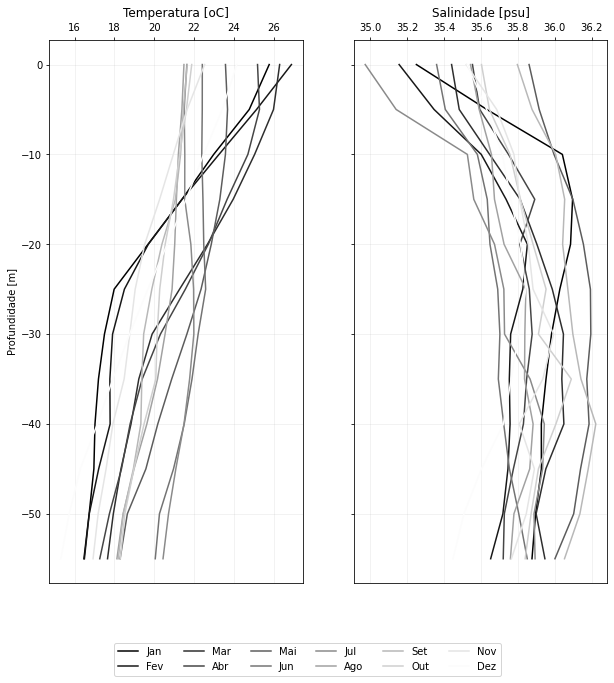

In [106]:
# ---- criando a visualização de dados que queremos ---- #
fig,axes = plt.subplots(ncols=2, sharey=True, figsize=(10,10))

# loop no número dos meses. Começamos em 1 pois o 0 é a profundidade na nossa matriz
for mes in np.arange(1,13,1):
    # extraindo cor e nome do mês
    col = colors[mes-1]
    nome_mes = labels[mes-1]
    
    # extraindo propriedades hidrográficas
    T,S = temperatura[:, mes], salinidade[:, mes]
    
    # plotando nos subplots
    axes[0].plot(T, -profundidade, c=col, label=nome_mes)
    axes[1].plot(S, -profundidade, c=col, label=nome_mes)

# adicionando titulos para cada subplot
axes[0].set_title('Temperatura [oC]')
axes[1].set_title('Salinidade [psu]')
axes[0].set_ylabel('Profundidade [m]')

# eixo x no topo
_ = [ax.xaxis.tick_top() for ax in axes]

# adicionando gradeamento
_ = [ax.grid('--', alpha=.2) for ax in axes]
# adicionando legenda
plt.legend(ncol=6, bbox_to_anchor=(.6, -.1))
plt.savefig('lec03_exercicion3.png', bbox_to_inches='tight')

# Aula 4 - Precisamos falar sobre pandas

![image.png](../figures/pandas_computer.gif)

**material de apoio**:

- Livro online com exemplos e descrições sobre numpy, matplotlib e pandas: [[link]](https://jakevdp.github.io/PythonDataScienceHandbook/)
- Lemenkova, P. (2019). Processing oceanographic data by Python libraries NumPy, SciPy and Pandas. [[link]](https://hal.archives-ouvertes.fr/hal-02093491/document)
- Lista de pacotes aplicados à oceanografia (olhem com cautela, tem muita coisa): [[link]](https://medium.com/@hafezahmad/some-essential-python-applications-in-the-oceanographic-data-analysis-and-visualization-569d6af25fd4)
- Guia do usuário de Pandas: [[link]](https://pandas.pydata.org/pandas-docs/stable/user_guide)

- Thermodynamics Equation of Seawater - 2010: [[link]](http://www.teos-10.org/software.htm)

**O que é o pandas?**

- pacote para analisar dados tabulares
- muito utilizado para análise de séries temporais
- ciência de dados, aprendizado de máquina? Tem pandas!
- na oceanografia também! 

#### O que são dados tabulares?

- dados estruturados
- colunas representam variáveis
- linhas são informações destas variáveis (observações/medições)
- compartilham o mesmo índice
- formatos:

![](https://pandas.pydata.org/docs/_images/02_io_readwrite.svg)
Fonte: [Getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) do Pandas

#### Conceitos importantes para utilizar o pandas

- Series: matriz 1D com um índice definido (perfil vertical)
    
- DataFrame: matriz 2D, com eixos rotulados que compartilham o mesmo índice (perfis vertical)

- Eixos: axis == 0 (rows) e axis == 1 (cols)
    
![image.png](https://pandas.pydata.org/docs/_images/01_table_dataframe.svg)
Fonte: [Getting started](https://pandas.pydata.org/docs/getting_started/index.html#getting-started) do Pandas

### Vamos ver algumas funcionalidade básicas

Criando objetos (Series e DataFrame):

- ```data``` para indicar os dados que serão armazenados na estrutura e 
- ```index``` para apontar o indexamento que eles terão.

In [80]:
# padrão de importação
import pandas as pd

# criando um pd.Series
sr = pd.Series(data=np.random.randn(5), index=np.arange(0,5))

# criando um pd.DataFrame: notem o F maiúsculo
df = pd.DataFrame(data={'serie1': sr, 'serie2': np.random.randn(5)}, index=sr.index)

sr

0   -0.386071
1    0.065731
2   -1.022831
3   -0.937563
4   -1.070384
dtype: float64

No entanto, é comum utilizar dicionários para criar DataFrame, pois podemos indicar também qual o nome de cada coluna (cabeçalho, header), ao passo que em Series não temos esta possibilidade:

In [88]:
pd.Series(data={'coluna1': np.random.randn(10)}, index=np.arange(10))
# pd.DataFrame(data={'coluna1': np.random.randn(10)}, index=np.arange(10))

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
dtype: object

Utiliza-se o **pandas** para leitura de arquivos csv e planilhas excel, estruturando estes arquivos em um DataFrame organizado. 

Mas como nem tudo é um mar de rosas, precisamos muitas vezes limpar essa planilha, lidar com caracteres acentuados, etc. 

Vamos ver alguns casos, utilizando um arquivo csv do projeto SIMCOSTA:

In [63]:
!cat ../dados/SIMCOSTA_RJ-3_MET_2016-07-14_2019-05-24.csv

**adicionar:**
- criar datetime a partir das colunas do csv
- renomear o header do df
- explicar melhor o conceito de linhas e colunas neste caso
- explicar .head(), .tail(), .describe(), .info()

In [76]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://raw.githubusercontent.com/nilodna/python-basico/feature_iojr-shortcourse/dados/pnboia_vitoria.csv

In [85]:
# leitura do arquivo
df = pd.read_csv('../dados/pnboia_vitoria.csv')

# descrição em termos estatísticos
df.describe()

/home/danilo/miniconda3/envs/doc_env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (35,38,41,44,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,# Epoca,Year,Month,Day,Hour,Minute,Wspdflag,Wspdflagid,Wdir,Wdirflag,...,Cdir3flagid,Wvhtflag,Wvhtflagid,Wmaxflag,Wmaxflagid,Dpdflag,Dpdflagid,Mwd,Mwdflag,Mwdflagid
count,1.450300e+04,14503.000000,14503.000000,14503.000000,14503.000000,14503.0,14503.000000,14503.000000,14503.000000,14503.000000,...,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000,14503.000000
mean,1.471006e+09,2016.131904,6.299111,15.715507,11.584500,21.0,0.001931,0.000207,128.362201,0.001931,...,0.502241,0.091291,0.024753,0.091291,0.023650,0.091291,0.023168,-120.026133,0.091291,0.022271
std,1.531814e+07,0.613970,3.680174,8.786352,6.957216,0.0,0.087860,0.018567,137.617630,0.087860,...,0.500564,0.597375,0.201380,0.597375,0.183983,0.597375,0.167365,1487.246461,0.597375,0.148036
min,1.444756e+09,2015.000000,1.000000,1.000000,0.000000,21.0,0.000000,0.000000,-9999.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,0.000000
25%,1.457807e+09,2016.000000,3.000000,8.000000,6.000000,21.0,0.000000,0.000000,35.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,0.000000,0.000000
50%,1.470859e+09,2016.000000,6.000000,16.000000,11.000000,21.0,0.000000,0.000000,87.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,0.000000
75%,1.483911e+09,2017.000000,10.000000,23.000000,18.000000,21.0,0.000000,0.000000,214.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,144.000000,0.000000,0.000000
max,1.500156e+09,2017.000000,12.000000,31.000000,23.000000,21.0,4.000000,2.000000,381.000000,4.000000,...,2.000000,4.000000,8.000000,4.000000,9.000000,4.000000,9.000000,369.000000,4.000000,2.000000


In [84]:
# informações em termos computacionais: tipo das colunas, nomes, quantidade de linhas, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14503 entries, 0 to 14502
Data columns (total 66 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   # Epoca      14503 non-null  int64 
 1   Lat          14503 non-null  object
 2   Lon          14503 non-null  object
 3   Year         14503 non-null  int64 
 4   Month        14503 non-null  int64 
 5   Day          14503 non-null  int64 
 6   Hour         14503 non-null  int64 
 7   Minute       14503 non-null  int64 
 8   Battery      14503 non-null  object
 9   bHead        14503 non-null  object
 10  Wspd         14503 non-null  object
 11  Wspdflag     14503 non-null  int64 
 12  Wspdflagid   14503 non-null  int64 
 13  Wdir         14503 non-null  int64 
 14  Wdirflag     14503 non-null  int64 
 15  Wdirflagid   14503 non-null  int64 
 16  Gust         14503 non-null  object
 17  Gustflag     14503 non-null  int64 
 18  Gustflagid   14503 non-null  int64 
 19  Atmp         14503 non-nu

- temos muita informação neste conjunto 
- podemos selecionar estas informações durante a leitura do arquivo
- explorar metadados

#### Opções durante leitura do arquivo

- ```skiprows```: pular, durante a leitura, uma quantidade de linhas
- ```sheet_name```: para ler uma aba específica de uma planilha excel
- ```sep```: qual o separador ou delimitador do arquivo (padrão ;)

- ```header```: qual linha deve ser utilizada para nomear colunas
- ```names```: nomear colunas manualmente
- ```usecols```: selecionar quais colunas devem ser lidas (utiliza-se números inteiros)

- ```index_col```: indicar qual coluna deve ser o índice

- ```encoding``` (utf8 padrão e latin1 para ç à é î ã): para casos com caracteres acentuados

- ```decimal```: substitui virgulas por ponto, porém use com cautela!

In [139]:
df = pd.read_csv('../dados/pnboia_vitoria.csv', 
                 usecols=[0,1,2, 8], index_col=0, 
                 decimal=',',
                 dtype=float)

df.head() # de forma análoga existe o .tail()

,Lat,Lon,Battery
# Epoca,,,
1.444756e+09,-19.935850,-39.704233,-9999.0
1.444759e+09,-19.935883,-39.704183,-9999.0
1.444763e+09,-19.936000,-39.704100,-9999.0
1.444766e+09,-19.936133,-39.703967,-9999.0
1.444770e+09,-19.936117,-39.703933,-9999.0


Em alguns casos, porém:

- valores invalido possuem outro caracter (ex: -9999)
- substituímos usando o método ```.replace()```
- inserimos ```np.nan``` no lugar

In [141]:
df = df.replace(-9999, np.nan)
df.head() # porém é um float:

,Lat,Lon,Battery
# Epoca,,,
1.444756e+09,-19.935850,-39.704233,NaN
1.444759e+09,-19.935883,-39.704183,NaN
1.444763e+09,-19.936000,-39.704100,NaN
1.444766e+09,-19.936133,-39.703967,NaN
1.444770e+09,-19.936117,-39.703933,NaN


In [143]:
print(np.nan)
type(np.nan)

nan


float

### Removendo dados

- ```.drop()```: remove dados específicos, indicando index/coluna

In [149]:
df.drop(['Battery'], axis=1).head()

,Lat,Lon
# Epoca,,
1.444756e+09,-19.935850,-39.704233
1.444759e+09,-19.935883,-39.704183
1.444763e+09,-19.936000,-39.704100
1.444766e+09,-19.936133,-39.703967
1.444770e+09,-19.936117,-39.703933


### Removendo dados

- ```.drop()```: remove dados específicos, indicando index/coluna
- ```.dropna()```: remove valores faltantes (not-a-number)

In [162]:
df.dropna()

### Removendo dados

- ```.drop()```: remove dados específicos, indicando index/coluna
- ```.dropna()```: remove valores faltantes (not-a-number)
- ```.fillna()```: preenche valores faltantes usando alguns métodos

In [163]:
df.fillna(method='backfill').tail() #pad

#### Retomando o conjunto de dados da semana passada

- retomando o conjunto de dados utilizados na aula anterior
- inserir em um Dataframe
- colunas nomeadas pelo mês

In [89]:
# lista com meses
meses_siglas = ['z', 'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
# lendo arquivo
df_temp = pd.read_csv('../dados/temperatura_woa2018_ubatuba_60m.csv', sep=',',
                      header=None, index_col=None, names=meses_siglas)

df_temp

,z,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,0.0,25.780909,26.898490,26.306210,25.193900,23.58231,22.418090,21.63910,21.495000,21.659710,21.88560,22.535710,24.151209
1,5.0,24.777710,25.145191,25.997910,25.292210,23.68611,22.415500,21.50831,21.392090,21.464290,21.61869,21.656391,23.421900
2,10.0,22.989990,23.257100,25.047810,24.708990,23.58030,22.391190,21.53759,21.214610,21.325610,21.27759,20.960810,22.481491
3,15.0,21.399410,21.395710,23.969300,23.665290,23.29881,22.450400,21.53441,21.115290,21.065810,20.96969,20.271790,21.607891
4,20.0,19.691910,19.703000,22.677690,22.719390,22.86900,22.490600,21.84231,21.031391,20.387510,20.55181,19.522709,20.653690
5,25.0,17.986710,18.501810,21.276290,21.566410,22.35550,22.586910,21.98050,20.898290,19.880000,20.27740,19.043991,19.682690
6,30.0,17.498909,17.907010,19.894491,20.312510,21.64240,22.208090,21.99181,20.545200,19.469810,20.14820,18.770390,18.762810
7,35.0,17.197691,17.770500,19.225590,19.396000,20.87930,21.899710,21.77969,20.165010,19.378590,20.07990,18.488600,17.920109
8,40.0,17.022590,17.784191,18.834300,18.789710,20.17989,21.508709,21.49789,19.630410,19.328290,19.49021,17.923090,17.141209
9,45.0,16.967190,17.208391,18.328990,18.354210,19.58121,20.970110,21.08669,18.984690,18.953190,18.97859,17.580809,16.284891


### Seleção de dados por rótulo e por posição

Motivos:
- exploração
- limpeza

Como:
- ```.loc[row, col]```
- ```.iloc[nrow, ncol]```

Exemplos:

In [211]:
# o primeiro item deve ser a linha (neste caso todas)
# o segundo deve ser o nome das colunas
df_temp.loc[:, ['Jan', 'Dez']]

,Jan,Dez
z,,
0.0,35.249710,35.525112
5.0,35.631490,35.630810
10.0,36.041090,35.715390
15.0,36.096400,35.760990
20.0,36.085390,35.814790
25.0,36.027313,35.843100
30.0,35.982310,35.803200
35.0,35.952390,35.763813
40.0,35.927100,35.721310


In [213]:
# podemos configurar um index novo e argumento novo!
df_temp.set_index('z', inplace=True)

df_temp.loc[:5, ['Fev']]

,Fev
z,
0.0,35.156113
5.0,35.345600


In [214]:
# e podemos resetar o indice também
df_temp.reset_index(inplace=True)

# acessar as informações por índices numéricos, tal qual o numpy
df_temp.iloc[0,1]

35.24971

Para descobrir quais os "nomes" das linhas e colunas:

In [166]:
df_temp.columns

Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',
       'Nov', 'Dez'],
      dtype='object')

In [167]:
df_temp.index

Float64Index([0.0, 5.0, 10.0, 15.0, 20.0, 25.0, 30.0, 35.0, 40.0, 45.0, 50.0,
              55.0],
             dtype='float64')

### Visualização de dados

- integração Numpy e Matplotlib
- acesso aos métodos 
- facilidade

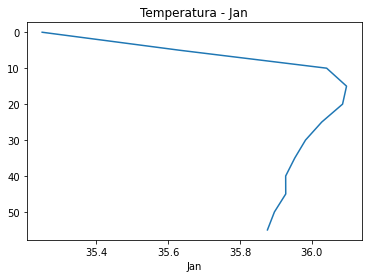

In [42]:
# plotando perfis verticais para Janeiro
df_temp.plot(x='Jan', y='z', 
             title='Temperatura - Jan',
             legend=False)
# infelizmente o pandas, ainda, não possui um argumento para inverter o eixo y
plt.gca().invert_yaxis()

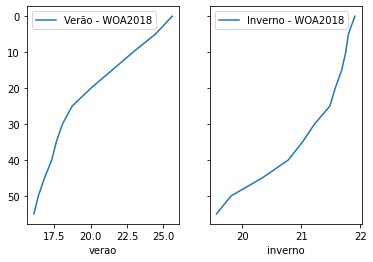

In [97]:
# plotando as médias de verão e inverno
meses_verao = ['Dez', 'Jan', 'Fev']
meses_inverno = ['Jun', 'Jul', 'Set']

df_temp['verao'] = df_temp[meses_verao].mean(axis=1)
df_temp['inverno'] = df_temp[meses_inverno].mean(axis=1)

fig,axes = plt.subplots(ncols=2, sharey=True)

df_temp.plot(x='verao', y='z', ax=axes[0], label='Verão - WOA2018')
df_temp.plot(x='inverno', y='z', ax=axes[1], label='Inverno - WOA2018')
plt.gca().invert_yaxis()

- nem sempre é tão benéfico usar pandas
- visualização fácil durante anális exploratória
- potencial em termos de análise estatística
- falaremos mais no próximo encontro

### Combinando pandas e oceanografia

__disclaimer__: este trecho do material foi fortemente baseado (se não copiado) do trabalho feito pelo Prof. Filipe Fernandes neste [link](https://github.com/ocefpaf/pyrantine/blob/master/notebooks/02-CTD/02-CTD-processing.ipynb).

-----
- GSW: Gibbs Seawater, conjunto de convenções oceanográficas (TEOS-10)
    - tipos de salinidade a partir de condutividade
    - temperatura
    - frequência de Brunt-Vaisalla
    - outros
-----
- CTD: Pacote para leitura, tratamento e análise de dados de perfis verticais de diversos instrumentos

    - CTD (Seabird, Fallmouth, outros)
    - XBT
    - Rosete

**nota**: Existem outros pacotes para análises de CTD.

O pacote ```CTD``` amplifica os poderes do pandas para perfis vertical. Com poucas linhas podemos:

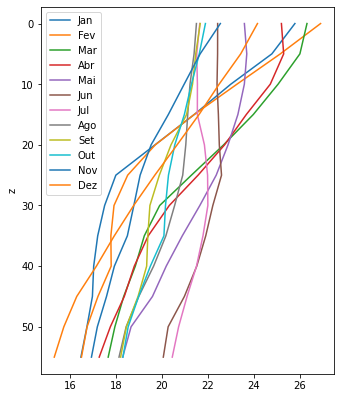

In [58]:
import ctd
df = pd.read_csv('../dados/temperatura_woa2018_ubatuba_60m.csv', sep=',',
                      header=None, index_col=0, names=meses_siglas)

df.plot_cast(legend=True, cmap=colors)
plt.legend()

Vai muito além da visualização! Podemos aplicar pré-processamento de forma simple, porém com muito controle sobre tudo.

Vejamos:

In [ ]:
# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../dados/ https://github.com/ocefpaf/pyrantine/raw/master/notebooks/02-CTD/CTD-data/CTD-spiked-unfiltered.cnv.bz2

In [60]:
cast = ctd.from_cnv('../dados/CTD-spiked-unfiltered.cnv.bz2')

cast

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
Pressure [dbar],,,,,,,,,,,,,,,,,,,,,
6.433,1.0,0.000,26.9647,26.9314,5.821803,5.800920,2.1099,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.970,69.61016,137.397,0.000,0.00,0.16484,99.2996,False
6.448,2.0,0.042,26.9644,26.9307,5.821615,5.800819,2.1148,1.000000e-12,1.9601,8.580,...,-37.22588,False,26.969,69.82216,137.817,0.351,8.43,0.16484,99.3260,False
6.433,3.0,0.083,26.9642,26.9301,5.821421,5.800727,2.1209,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.08688,138.341,-0.351,-16.87,0.16606,99.3260,False
6.448,4.0,0.125,26.9639,26.9296,5.821264,5.800727,2.1270,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.35184,138.865,0.351,16.86,0.16606,99.3260,False
6.433,5.0,0.167,26.9640,26.9291,5.821219,5.800634,2.1331,1.000000e-12,0.0000,8.575,...,-37.22588,False,26.969,70.61657,139.388,-0.351,-16.86,0.16606,99.3525,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7.879,71321.0,2971.667,26.9742,26.9758,5.845051,5.845769,2.5800,1.000000e-12,3.9202,8.570,...,-37.22778,True,26.979,90.01917,177.472,-1.054,-16.87,0.15873,97.2099,False
7.923,71322.0,2971.708,26.9745,26.9758,5.845036,5.845769,2.5800,1.000000e-12,1.9601,8.570,...,-37.22778,True,26.979,90.01966,177.473,1.055,50.61,0.15995,97.2099,False
7.937,71323.0,2971.750,26.9742,26.9759,5.845081,5.845769,2.5800,1.000000e-12,3.9202,8.570,...,-37.22778,True,26.979,90.01981,177.473,0.352,-16.87,0.15751,97.2628,False


- separação em down e up cast
- simples!

In [61]:
down,up = cast.split()
cast.shape, down.shape, up.shape

((71325, 30), (34632, 30), (36693, 30))

Métodos de pré processamento disponível:

- remoção de informações fora da coluna d'água
- filtro para ruídos de alta frequência
- remoção de spike por desvio padrão
- checagem para inversão de profundidade
- interpolação e alisamento
- média em caixas (binagem)

In [63]:
down_final = down.remove_above_water()\
            .lp_filter()\
            .despike(n1=2, n2=20, block=100)\
            .press_check()\
            .interpolate()\
            .bindata(delta=1)\
            .smooth(window_len=21, window="hanning")

down_final.head()

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,longitude,pumps,pla,sbeox0PS,sbeox0Mm/Kg,dz/dtM,accM,flSP,xmiss,flag
7.5,4572.670528,190.486269,26.974138,26.975597,5.845094,5.846064,2.576549,1.000000e-12,0.234759,8.58,...,-37.225444,1.0,26.979018,89.862263,177.162189,0.803320,0.137719,0.177155,97.155540,0.0
8.5,4634.553275,193.064709,26.974698,26.976090,5.845201,5.846167,2.577343,1.000000e-12,0.304238,8.58,...,-37.225432,1.0,26.979339,89.908545,177.251856,0.785147,0.880307,0.179292,97.453742,0.0
9.5,4695.732139,195.613821,26.975249,26.976574,5.845306,5.846268,2.578064,1.000000e-12,0.370249,8.58,...,-37.225420,1.0,26.979651,89.951597,177.335180,0.769359,1.646066,0.181447,97.746573,0.0
10.5,4755.592501,198.107997,26.975775,26.977037,5.845408,5.846367,2.578649,1.000000e-12,0.433155,8.58,...,-37.225409,1.0,26.979938,89.988596,177.406640,0.754504,2.341553,0.183725,98.024102,0.0
11.5,4813.635347,200.526444,26.976265,26.977470,5.845505,5.846461,2.579031,1.000000e-12,0.500165,8.58,...,-37.225398,1.0,26.980190,90.016588,177.460450,0.739713,2.898081,0.186157,98.277968,0.0


Vamos conferir o que mudou de fato, comparando o perfil bruto e o tratado:

(100.0, 0.0)

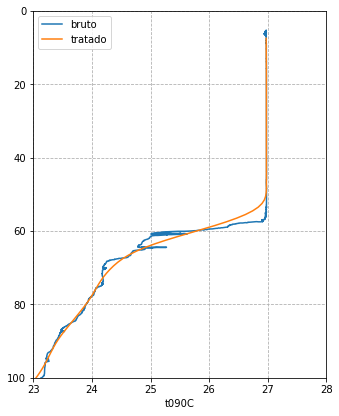

In [68]:
# comparando o perfil original e o processado
ax0 = down['t090C'].plot_cast(label='bruto')

ax1 = down_final['t090C'].plot_cast(ax=ax0, label='tratado')
ax1.grid(ls='--')
plt.legend()
# dando um zoom par verificarmos melhor as diferenças
ax1.set_xlim([23,28])
ax1.set_ylim([100,0])

O pacote CTD ainda nos permite acessar os metadados originais do arquivo CNV:

In [75]:
metadados = cast._metadata
metadados.keys()

dict_keys(['header', 'config', 'names', 'skiprows', 'time', 'lon', 'lat', 'name'])

No entanto, infelizmente essa propriedade do pacote não persiste quando editamos nosso dataframe original, precisando resgatar essa informação do original:

In [73]:
down._metadata

[]

#### Propriedade hidrográficas derivadas

Com um perfil devidamente tratado, utilizaremos o pacote GSW para computar propriedade derivadas destes dados:

- Salinidade Absoluta, Prática, Referência
- Temperatura Conservativa
- Densidade
- Consulta documentação para outras.

In [77]:
### para facilitar:

# extraindo pressao que é um índice
pressao = down_final.index

lon,lat = metadados['lon'], metadados['lat']
lon,lat

(-37.22533333333333, -17.9785)

In [83]:
# Salinidade Prática
SP = gsw.SP_from_C(down_final['c0S/m']*10, 
                   down_final['t090C'], 
                   pressao)

# Salinidade Absoluta
SA = gsw.SA_from_SP(SP, pressao, lon, lat)

In [81]:
# Temperatura conservativa
CT = gsw.CT_from_t(SA, 
                   down_final['t090C'].values,
                   pressao)

# Profundidade a partir da pressão
z = -gsw.z_from_p(pressao, lat)

# Anomalia da densidade potensial
sigma0 = gsw.sigma0(SA, CT)

Podemos inserir essas novas variáveis ao nosso dataframe com o método do pandas ```.assign()```:

In [82]:
down_final = down_final.assign(SP=SP, 
                               SA=SA,
                               CT=CT,
                               z=z,
                               sigma0=sigma0)
down_final.head()

,scan,timeS,t090C,t190C,c0S/m,c1S/m,sbeox0V,par,spar,ph,...,accM,flSP,xmiss,flag,SP,SA,SR,CT,z,sigma0
7.5,4572.670528,190.486269,26.974138,26.975597,5.845094,5.846064,2.576549,1.000000e-12,0.234759,8.58,...,0.137719,0.177155,97.155540,0.0,37.374813,37.551223,37.551051,26.880936,7.454923,24.516828
8.5,4634.553275,193.064709,26.974698,26.976090,5.845201,5.846167,2.577343,1.000000e-12,0.304238,8.58,...,0.880307,0.179292,97.453742,0.0,37.374809,37.551219,37.551047,26.881265,8.448893,24.516719
9.5,4695.732139,195.613821,26.975249,26.976574,5.845306,5.846268,2.578064,1.000000e-12,0.370249,8.58,...,1.646066,0.181447,97.746573,0.0,37.374802,37.551213,37.551040,26.881585,9.442857,24.516612
10.5,4755.592501,198.107997,26.975775,26.977037,5.845408,5.846367,2.578649,1.000000e-12,0.433155,8.58,...,2.341553,0.183725,98.024102,0.0,37.374791,37.551203,37.551030,26.881880,10.436817,24.516509
11.5,4813.635347,200.526444,26.976265,26.977470,5.845505,5.846461,2.579031,1.000000e-12,0.500165,8.58,...,2.898081,0.186157,98.277968,0.0,37.374775,37.551187,37.551013,26.882139,11.430772,24.516413


Por fim, vamos visualizar as nossas variáveis utilizando um exemplo elaborado pelo [Filipe Fernandes](https://github.com/ocefpaf/pyrantine/blob/master/notebooks/02-CTD/02-CTD-processing.ipynb):

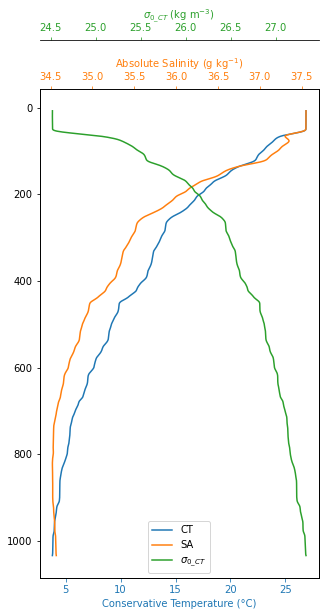

In [87]:
fig, ax0 = plt.subplots(figsize=(5, 9))

colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]
# invertendo orientação do eixo y
ax0.invert_yaxis()
# criando eixos gêmeos para y
ax1 = ax0.twiny()
ax2 = ax0.twiny()
# plotando temperatura
(l0,) = ax0.plot(down_final["CT"], down_final.index, color=colors[0], label="CT")
ax0.set_xlabel("Conservative Temperature (°C)")
# plotando salinidade absoluta
(l1,) = ax1.plot(down_final["SA"], down_final.index, color=colors[1], label="SA")
ax1.set_xlabel("Absolute Salinity (g kg$^{-1}$)")
# plotando densidade
(l2,) = ax2.plot(down_final["sigma0"], down_final.index, color=colors[2], label=r"$\sigma_{0\_CT}$")
ax2.set_xlabel(r"$\sigma_{0\_CT}$ (kg m$^{-3}$)")

ax2.spines["top"].set_position(("axes", 1.1))
ax2.spines["top"].set_visible(True)

ax0.xaxis.label.set_color(l0.get_color())
ax1.xaxis.label.set_color(l1.get_color())
ax2.xaxis.label.set_color(l2.get_color())

ax0.tick_params(axis="x", colors=l0.get_color())
ax1.tick_params(axis="x", colors=l1.get_color())
ax2.tick_params(axis="x", colors=l2.get_color())

lines = ax0.get_lines() + ax1.get_lines() + ax2.get_lines()
leg = {line: line.get_label() for line in lines}

ax0.legend(leg.keys(), leg.values(), loc=8)

ax0.grid(False)
ax1.grid(False)
ax2.grid(False)

plt.savefig('inlec04_verticalprof.png', dpi=150, bbox_to_inches='tight')


Exercício prático - Diagrama TS

Utilizando o conjunto de dados tratado neste encontro, faça:

**Nível 1:**:

- diagrama TS simples utilizando o conjunto de dados da WOA que já temos familiaridade
- customize colocando nome para os eixos x e y, título
- altere as cores e marcadores
- **dica** usaremos um método de visualização ainda não comentado: o ```plt.scatter()```

------


**Nível 2:**

Utilizando o pacote visto hoje (```CTD```), faça: 

- download do conjunto de dados indicado na próxima célula
- leia todos os arquivos cnv (provenientes de amostragens com CTD Seabird)
- explore as colunas e linhas e identifique as variáveis de temperatura e salinidade
- faça visualizações para esta propriedade
- customize utilizando os códigos já desenvolvidos no nível 1

------


**Nível 3:**

Para o mesmo conjunto de dados, vamos adicionar isolinhas de densidade para identificação de massas d'água. Para isso:

- crie matrizes 1D de Temperatura e Salinidade, utilizando o método ```np.linspace()```
- transforme essas matrizes em malhas 2D com o método ```np.meshgrid()```
- compute a densidade com o método ```.sigma0()``` do pacote GSw
- utilize o método ```plt.contour()``` para inserir as isolinhas no gráfico
- neste ponto, tente inserir rótulos dessas isolinhas dentro do próprio gráfico

Em seguida: 

- plote os pontos do diagrama como feito nos níveis 1 e 2
- customize seu diagrama TS

------



**Bônus**:

Tente adicionar as faixas de variações das densidades de massas d'águas. Abaixo deixo uma relação destes valores para facilitar. Utilize o método ```plt.fill_between()``` para isso, explorando seus argumentos para variar cores, por exemplo.

------
**Sugestões**

- deixo abaixo todos os passos já feito de pré processamento em um único bloco de códigos para copiarem e reutilizarem no local que forem resolver o exercício.

------
A esta altura vocês já estão familiarizados com a ferramentas de ajuda do python, então utilize-as:

- ```plt.contour?```
- ```help(plt.scatter)```
- google =]

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
import ctd
import gsw

# execute a linha de comando abaixo para fazer download do conjunto de dados que serão utilizados
!wget --directory-prefix=../dados/ https://github.com/ocefpaf/pyrantine/raw/master/notebooks/02-CTD/CTD-data/CTD-spiked-unfiltered.cnv.bz2

# lendo um arquivo .cnv, formato vindo do CTD da marca Seabird
cast = ctd.from_cnv('../dados/CTD-spiked-unfiltered.cnv.bz2')

down,up = cast.split()

down_final = down.remove_above_water()\
            .lp_filter()\
            .despike(n1=2, n2=20, block=100)\
            .press_check()\
            .interpolate()\
            .bindata(delta=1)\
            .smooth(window_len=21, window="hanning")

# extraindo metadados
metadados = cast._metadata

# extraindo pressao que é um índice
pressao = down_final.index

lon,lat = metadados['lon'], metadados['lat']


# Salinidade Prática
SP = gsw.SP_from_C(down_final['c0S/m']*10, 
                   down_final['t090C'], 
                   pressao)

# Salinidade Absoluta
SA = gsw.SA_from_SP(SP, pressao, lon, lat)

# Temperatura conservativa
CT = gsw.CT_from_t(SA, 
                   down_final['t090C'].values,
                   pressao)

# Profundidade a partir da pressão
z = -gsw.z_from_p(pressao, lat)

# Anomalia da densidade potensial
sigma0 = gsw.sigma0(SA, CT)

down_final = down_final.assign(SP=SP, 
                               SA=SA, 
                               CT=CT,
                               z=z,
                               sigma0=sigma0)

# ---- continuem a partir daqui ----- #